In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as s
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.drop(labels=data.columns[32],axis=1,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
data_columns = data.columns
data_columns = list(data_columns)

In [8]:
data_columns.remove('id')
data_columns.remove('diagnosis')

In [9]:
print(data_columns)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [10]:
def plot_grid_histplot(data,data_columns,shape,figure_size):

    data_columns = np.array(data_columns).reshape(shape[0],shape[1])
    fig , axes = plt.subplots(shape[0],shape[1],figsize=figure_size)

    for i in range (data_columns.shape[0]):
        for j in range (data_columns.shape[1]):
            sns.histplot(data=data,x=data_columns[i,j],hue='diagnosis',stat='density',bins=10,kde=True,
                         palette=[sns.color_palette()[3],sns.color_palette()[0]],element='step',ax=axes[i,j])

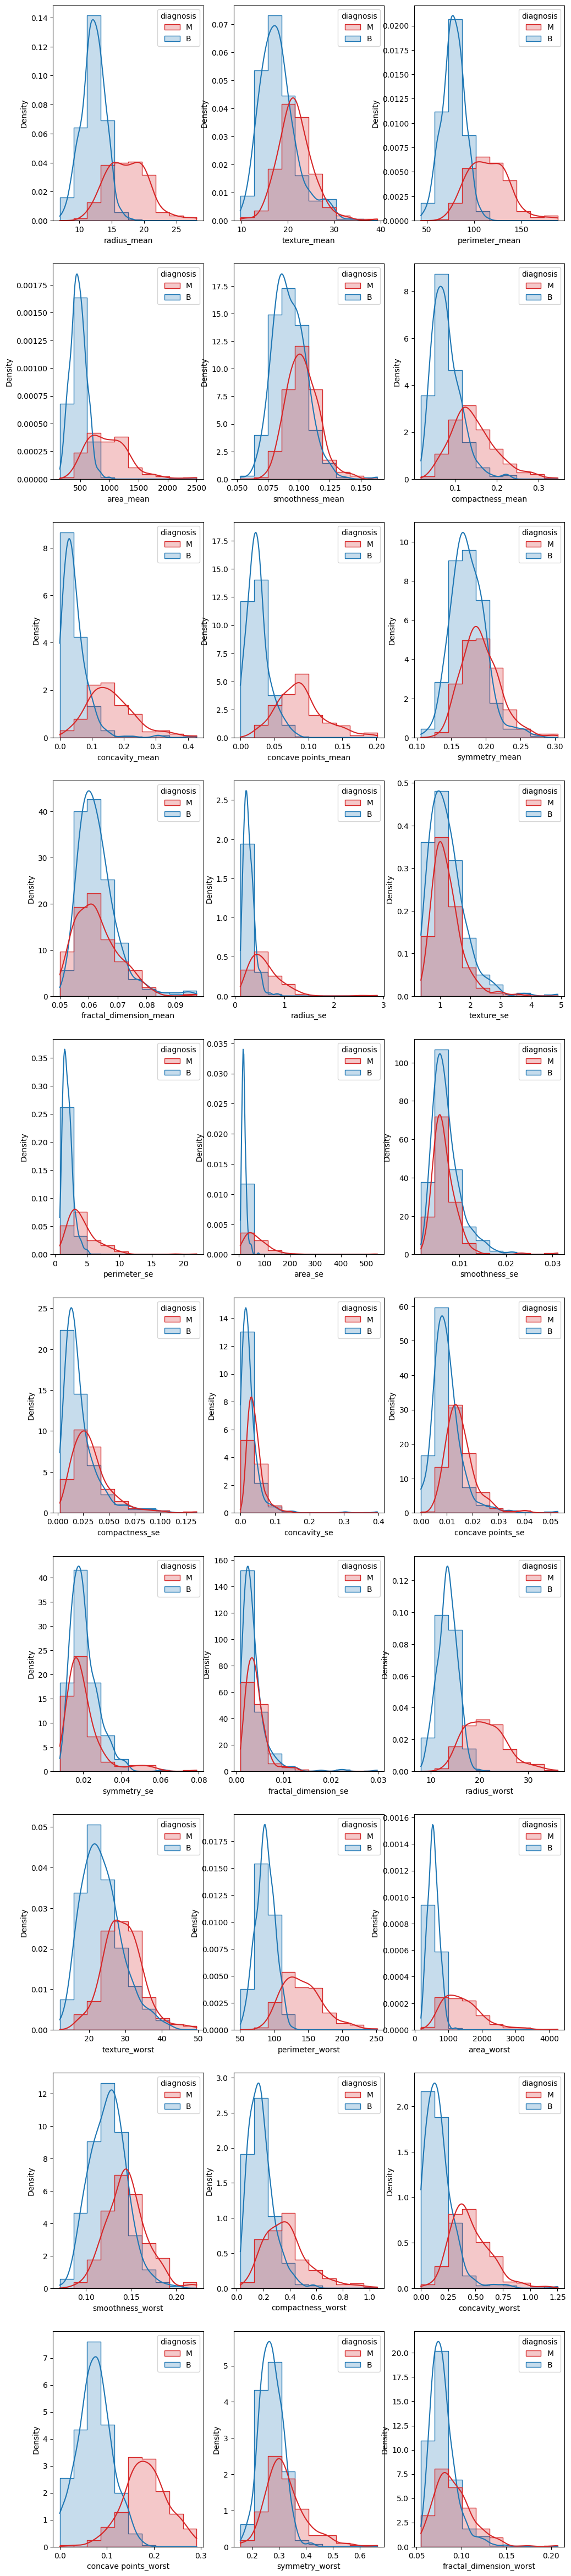

In [11]:
plot_grid_histplot(data , data_columns, shape=(10,3),figure_size=(12,60))

In [12]:
data_copy = data.replace(to_replace=['B','M'] , value=[0,1] , inplace=False)

C:\Users\hp\AppData\Local\Temp\ipykernel_2280\2630739525.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy = data.replace(to_replace=['B','M'] , value=[0,1] , inplace=False)


In [13]:
data_corr = data_copy.corr()

In [14]:
data_corr

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


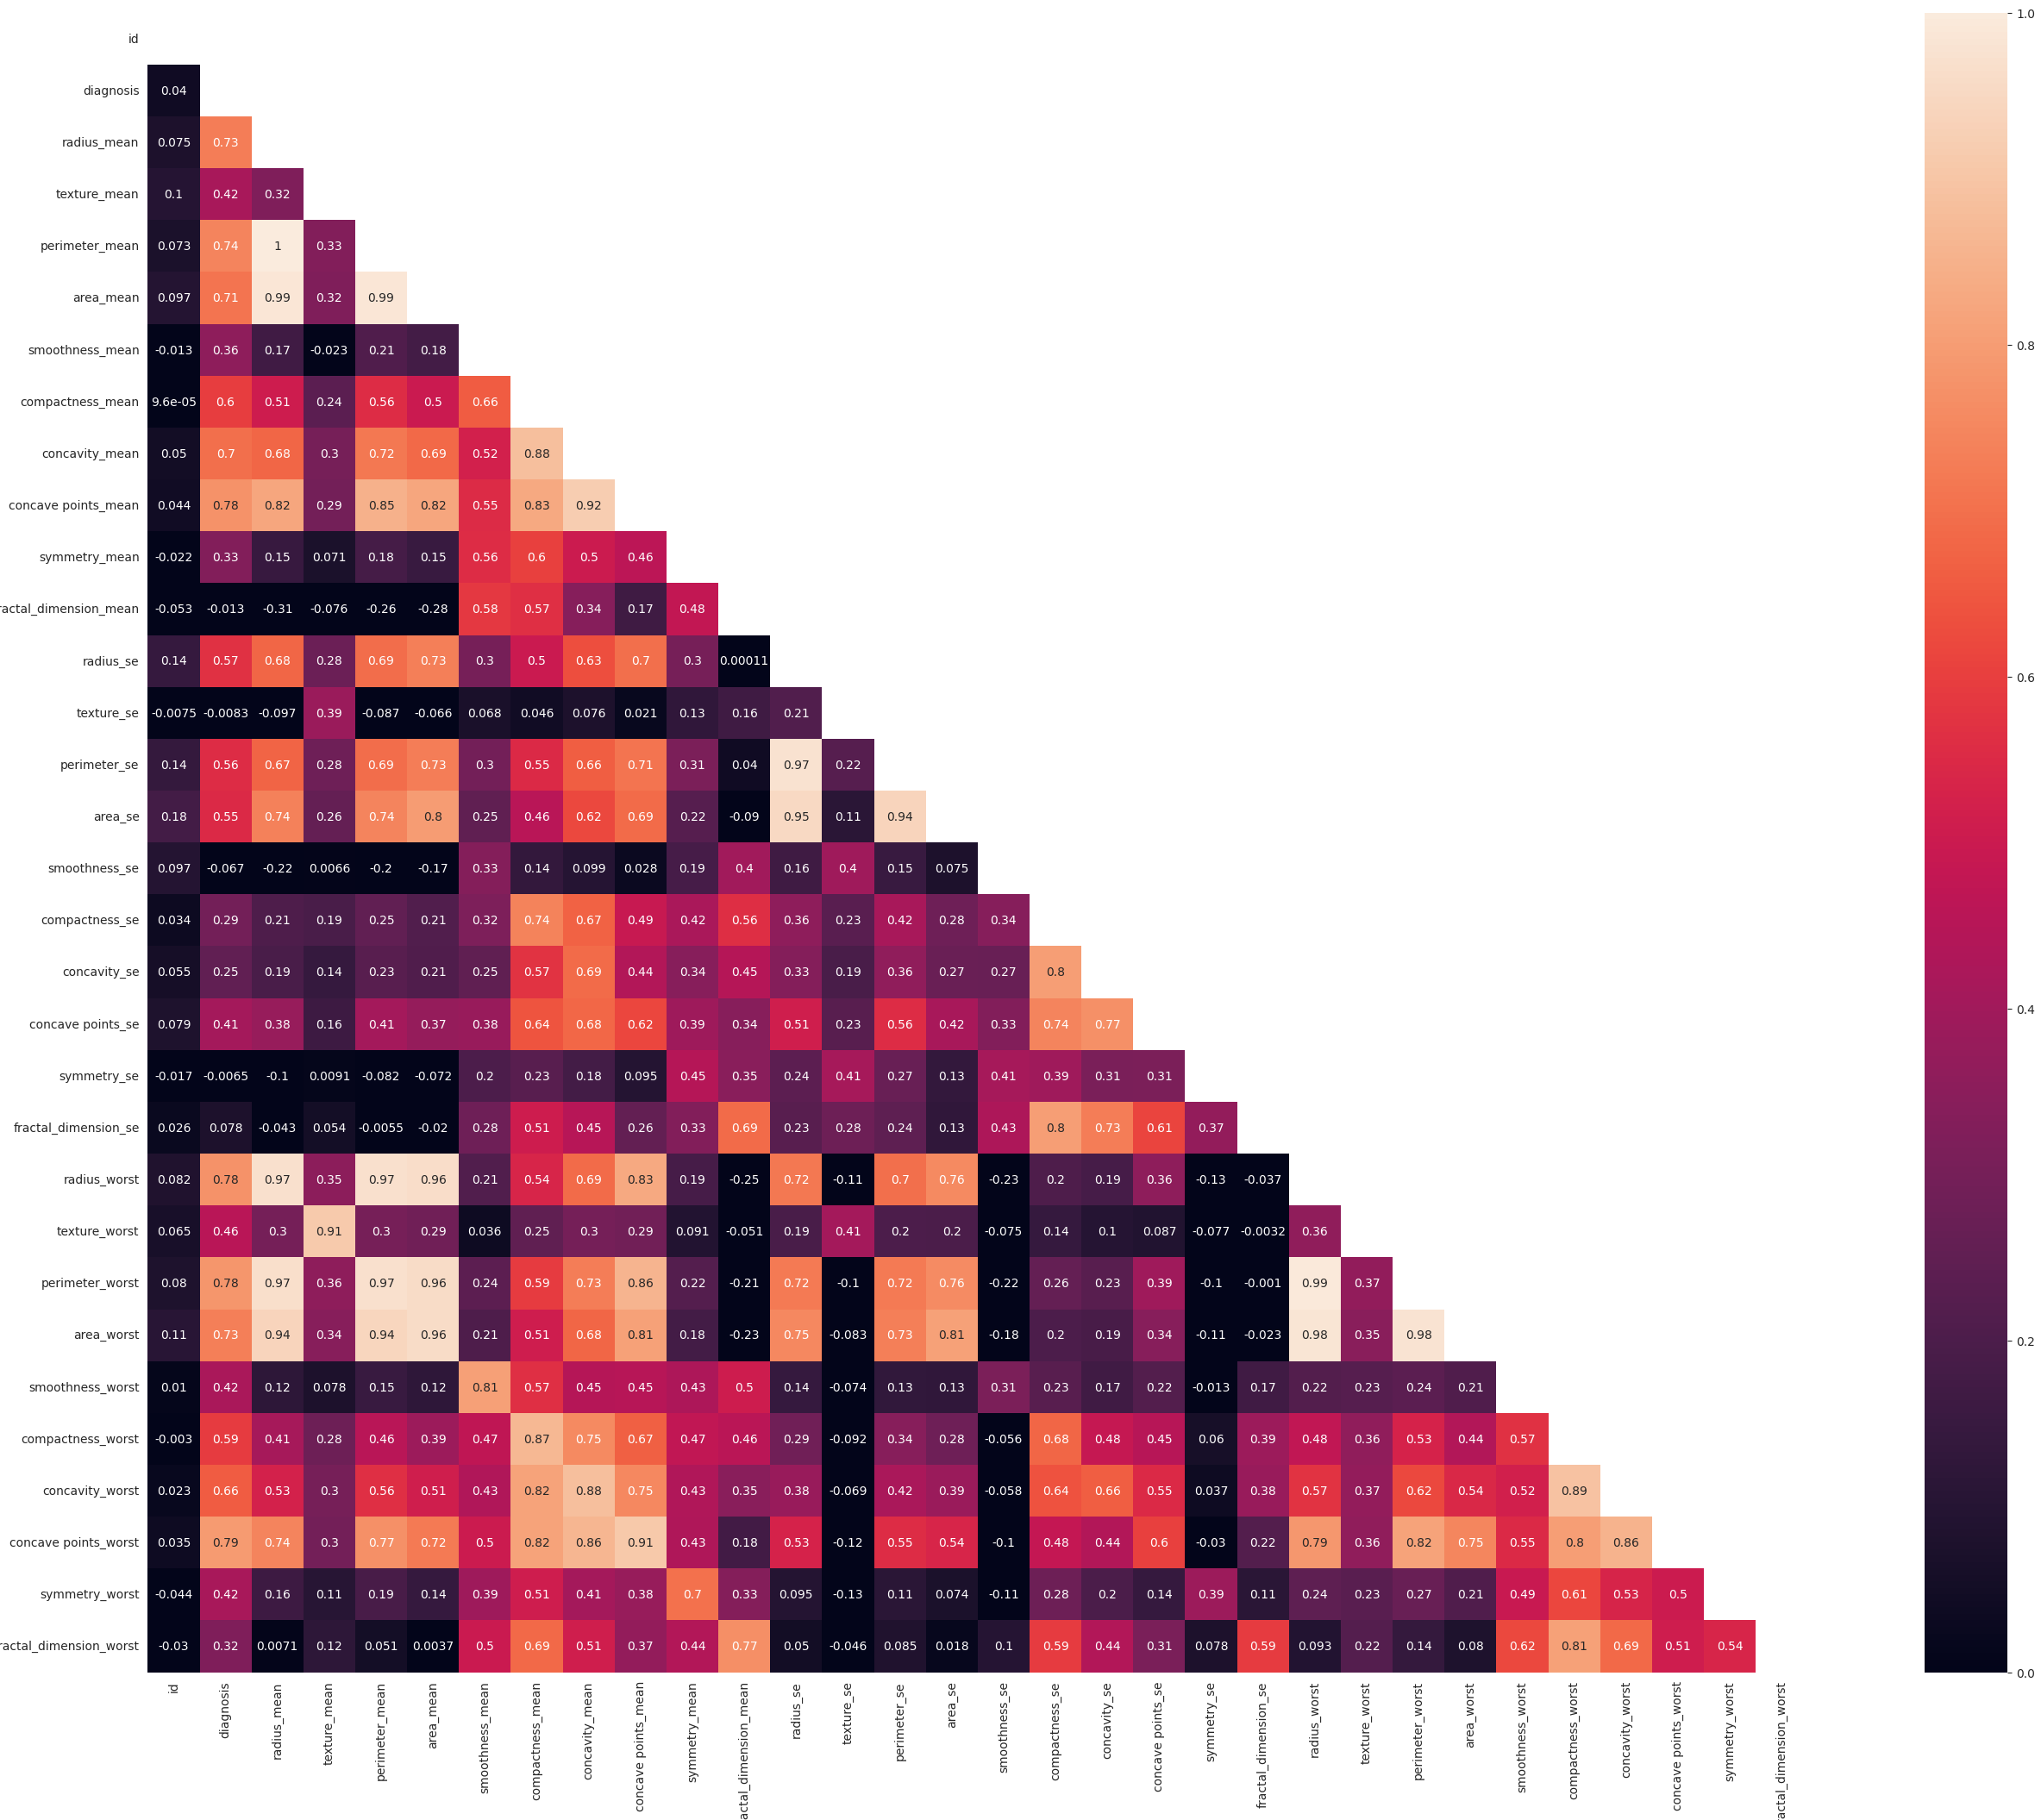

In [16]:
mask = np.zeros_like(data_copy.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f , ax = plt.subplots(figsize=(35,25))
    sns.heatmap(data=data_corr,vmin=0,vmax=1,mask=mask,square=True,annot=True)

In [15]:
strong_relation_features = pd.Series(data_corr['diagnosis']).nlargest(n=9).iloc[1:]
strong_relation_features

concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
Name: diagnosis, dtype: float64

In [16]:
diagnosis = data_copy['diagnosis']
data_copy = data_copy[list(strong_relation_features.to_dict().keys())]

In [17]:
data_copy['diagnosis'] = diagnosis

In [18]:
data_copy

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,diagnosis
0,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0,1
1,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0,1
2,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0,1
3,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1,1
4,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0,1
...,...,...,...,...,...,...,...,...,...
564,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0,1
565,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0,1
566,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1,1
567,0.2650,184.60,0.15200,25.740,140.10,1821.0,20.60,1265.0,1


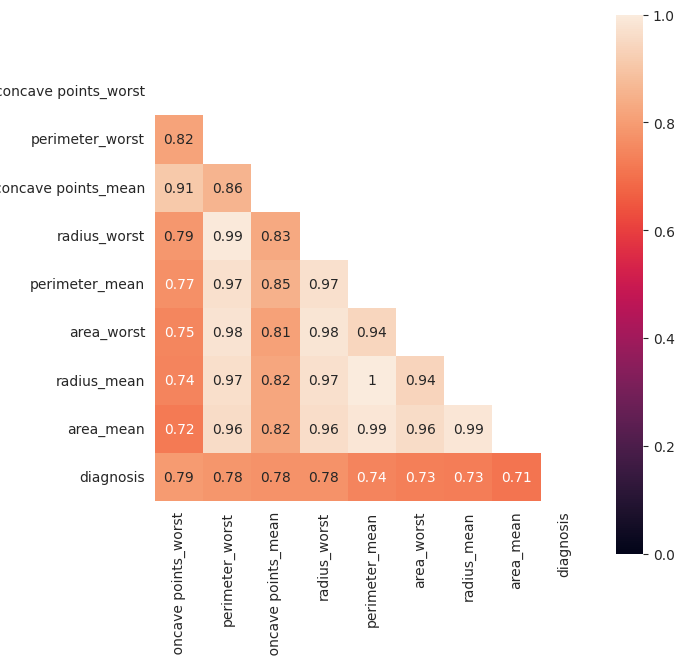

In [19]:
mask = np.zeros_like(data_copy.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f , ax = plt.subplots(figsize=(7,7))
    sns.heatmap(data=data_copy.corr(),vmin=0,vmax=1,mask=mask,square=True,annot=True)

In [20]:
data_copy_cov = np.array(data_copy[list(strong_relation_features.to_dict().keys())].cov())

In [21]:
data_copy_cov

array([[4.32074068e-03, 1.80307085e+00, 2.32144382e-03, 2.50164782e-01,
        1.23184809e+00, 2.79722743e+01, 1.72392739e-01, 1.67017894e+01],
       [1.80307085e+00, 1.12913085e+03, 1.11601611e+00, 1.61387312e+02,
        7.92328208e+02, 1.87028700e+04, 1.14288570e+02, 1.13417898e+04],
       [2.32144382e-03, 1.11601611e+00, 1.50566077e-03, 1.55720694e-01,
        8.02360375e-01, 1.78868809e+01, 1.12475116e-01, 1.12419582e+01],
       [2.50164782e-01, 1.61387312e+02, 1.55720694e-01, 2.33602242e+01,
        1.13858063e+02, 2.70785053e+03, 1.65137495e+01, 1.63752134e+03],
       [1.23184809e+00, 7.92328208e+02, 8.02360375e-01, 1.13858063e+02,
        5.90440480e+02, 1.30261484e+04, 8.54471417e+01, 8.43577235e+03],
       [2.79722743e+01, 1.87028700e+04, 1.78868809e+01, 2.70785053e+03,
        1.30261484e+04, 3.24167385e+05, 1.88822722e+03, 1.92192558e+05],
       [1.72392739e-01, 1.14288570e+02, 1.12475116e-01, 1.65137495e+01,
        8.54471417e+01, 1.88822722e+03, 1.24189201e+01, 1.

#check for the singular matrix or not

In [22]:
data_copy_cov_det = np.linalg.det(data_copy_cov)

In [23]:
data_copy_cov_det

114.15727331082711

In [24]:
data_copy_cov.shape

(8, 8)

In [25]:
#number of benaine tumers
data_copy[data_copy['diagnosis']==0].shape[0]

357

In [26]:
#number of maglinent tumers
data_copy[data_copy['diagnosis']==1].shape[0]

212

In [27]:
#split the data into traning and crossvalidation data set
class0_data = data_copy[data_copy['diagnosis']==0]
class1_data = data_copy[data_copy['diagnosis']==1]

class0_traning_data = class0_data.iloc[0:int(0.75*len(class0_data))]
class1_traning_data = class1_data.iloc[0:int(0.75*len(class1_data))]

class0_cv_data = class0_data.iloc[int(0.75*len(class0_data)):]
class1_cv_data = class1_data.iloc[int(0.75*len(class1_data)):]

traning_data = pd.concat([class0_traning_data , class1_traning_data])
cv_data = pd.concat([class0_cv_data , class1_cv_data])

In [28]:
traning_data

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,diagnosis
19,0.12880,99.70,0.047810,15.110,87.46,711.2,13.540,566.3,0
20,0.07283,96.09,0.031100,14.500,85.63,630.5,13.080,520.0,0
21,0.06227,65.13,0.020760,10.230,60.34,314.9,9.504,273.9,0
37,0.05013,84.46,0.029230,13.300,82.61,545.9,13.030,523.8,0
46,0.02564,57.26,0.005917,8.964,51.71,242.2,8.196,201.9,0
...,...,...,...,...,...,...,...,...,...
335,0.18270,143.20,0.099340,20.990,111.80,1362.0,17.060,918.6,1
337,0.20480,161.10,0.060900,24.540,122.90,1873.0,18.770,1092.0,1
339,0.20890,202.40,0.141000,30.670,155.10,2906.0,23.510,1747.0,1
343,0.22550,157.60,0.110300,22.750,129.90,1540.0,19.680,1194.0,1


In [29]:
cv_data

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,diagnosis
453,0.10690,103.10,0.06495,15.80,93.86,749.9,14.53,644.2,0
454,0.09851,91.62,0.02272,14.34,80.62,633.5,12.62,492.9,0
455,0.07763,96.69,0.03264,15.05,86.34,705.6,13.38,557.2,0
456,0.06835,86.04,0.02017,13.12,74.87,527.8,11.63,415.1,0
457,0.06005,91.29,0.02068,14.35,84.10,632.9,13.21,537.9,0
...,...,...,...,...,...,...,...,...,...
563,0.25420,179.10,0.14740,24.29,143.00,1819.0,20.92,1347.0,1
564,0.22160,166.10,0.13890,25.45,142.00,2027.0,21.56,1479.0,1
565,0.16280,155.00,0.09791,23.69,131.20,1731.0,20.13,1261.0,1
566,0.14180,126.70,0.05302,18.98,108.30,1124.0,16.60,858.1,1


In [30]:
traning_data[traning_data['diagnosis']==0].shape[0]

267

In [31]:
traning_data[traning_data['diagnosis']==1].shape[0]

159

In [32]:
#Maximum liklihood estimates for mu0 and sigma0
mu_0 = np.array(traning_data[traning_data['diagnosis']==0].iloc[:,0:8].mean())
sigma_0 = np.array(traning_data[traning_data['diagnosis']==0].iloc[:,0:8].cov())

In [33]:
print(mu_0)
print("\n")
print(sigma_0)

[7.25565206e-02 8.65285768e+01 2.51316142e-02 1.33153184e+01
 7.78015356e+01 5.52956554e+02 1.21099363e+01 4.59658427e+02]


[[1.24799793e-03 2.33595638e-01 4.62229640e-04 2.90240491e-02
  1.77007162e-01 2.27787494e+00 2.37186014e-02 1.74165784e+00]
 [2.33595638e-01 1.68923674e+02 9.08474662e-02 2.44241652e+01
  1.43244062e+02 1.98555879e+03 2.14729011e+01 1.60434642e+03]
 [4.62229640e-04 9.08474662e-02 2.47258225e-04 1.14300801e-02
  7.90182079e-02 8.95204743e-01 1.03937534e-02 7.70601175e-01]
 [2.90240491e-02 2.44241652e+01 1.14300801e-02 3.63796921e+00
  2.10735576e+01 2.95539108e+02 3.19150707e+00 2.38499208e+02]
 [1.77007162e-01 1.43244062e+02 7.90182079e-02 2.10735576e+01
  1.28930148e+02 1.71189839e+03 1.94005218e+01 1.44735365e+03]
 [2.27787494e+00 1.98555879e+03 8.95204743e-01 2.95539108e+02
  1.71189839e+03 2.43262450e+04 2.59367182e+02 1.95797831e+04]
 [2.37186014e-02 2.14729011e+01 1.03937534e-02 3.19150707e+00
  1.94005218e+01 2.59367182e+02 2.94000204e+00 2.19284113e+02]


In [34]:
#maximum liklihood estimate for mu1 and sigma1
mu_1 = np.array(traning_data[traning_data['diagnosis']==1].iloc[:,0:8].mean())
sigma_1 = np.array(traning_data[traning_data['diagnosis']==1].iloc[:,0:8].cov())

In [35]:
print(mu_1)
print("\n")
print(sigma_1)

[1.79001824e-01 1.38807862e+02 8.51771069e-02 2.07947799e+01
 1.13026792e+02 1.37485660e+03 1.71230818e+01 9.39661635e+02]


[[2.15464139e-03 6.64198315e-01 1.18176581e-03 8.48323476e-02
  3.98516646e-01 1.09712013e+01 5.04887418e-02 5.59495795e+00]
 [6.64198315e-01 7.93268962e+02 6.25047827e-01 1.14112455e+02
  5.46343486e+02 1.52933476e+04 7.96558035e+01 8.90425140e+03]
 [1.18176581e-03 6.25047827e-01 1.14172514e-03 8.22302215e-02
  4.96702010e-01 1.08180311e+01 6.65784197e-02 7.54971736e+00]
 [8.48323476e-02 1.14112455e+02 8.22302215e-02 1.69882454e+01
  7.92678281e+01 2.27755860e+03 1.17301314e+01 1.31011037e+03]
 [3.98516646e-01 5.46343486e+02 4.96702010e-01 7.92678281e+01
  4.50539926e+02 1.04802879e+04 6.58405884e+01 7.36645659e+03]
 [1.09712013e+01 1.52933476e+04 1.08180311e+01 2.27755860e+03
  1.04802879e+04 3.11846529e+05 1.55117287e+03 1.75714773e+05]
 [5.04887418e-02 7.96558035e+01 6.65784197e-02 1.17301314e+01
  6.58405884e+01 1.55117287e+03 9.72008601e+00 1.08612869e+03]


In [36]:
def predict_classes(data):

    prob_xi_given_class1 = s.multivariate_normal.pdf(data,mu_1,sigma_1)
    prob_xi_given_class0 = s.multivariate_normal.pdf(data,mu_0,sigma_0)
    prob_class1_given_xi = prob_xi_given_class1/(prob_xi_given_class1 + prob_xi_given_class0)
    
    return prob_class1_given_xi > 0.5         

In [37]:
predicted_classes = predict_classes(cv_data.iloc[:,0:8])

In [38]:
predicted_classes

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [39]:
confusion_matrix(y_true=cv_data['diagnosis'],y_pred=predicted_classes)

array([[86,  4],
       [ 3, 50]], dtype=int64)

In [40]:
print(classification_report(y_true=cv_data['diagnosis'],y_pred=predicted_classes))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

